# Assignment Dataprocessing  

## (a)

In [280]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# handling FutureWarnings
pd.set_option("future.no_silent_downcasting", True)

path = os.path.join(os.getcwd(), "../Data/College.csv")
college = pd.read_csv(path)

## (b)

In [281]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [282]:
college2 = pd.read_csv(path, index_col =0)
college3 = college.rename({"Unnamed: 0": "College"}, axis =1)
college3 = college3.set_index("College")
college = college3

## (c)

In [283]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## (d)

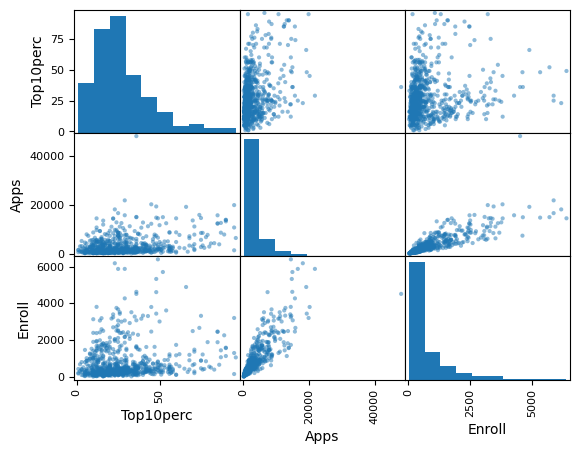

In [284]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])
plt.show()

## (e)

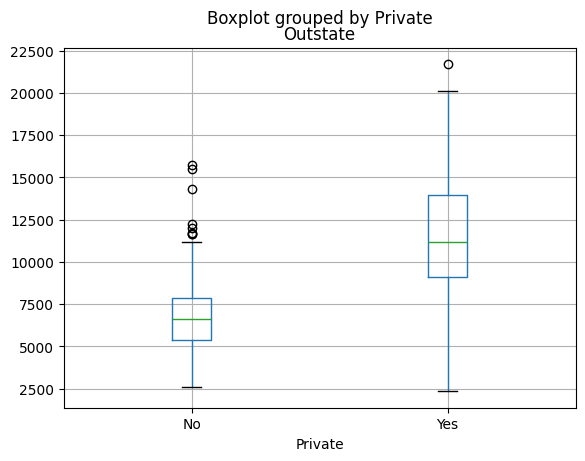

In [285]:
college.boxplot(column = "Outstate", by = "Private")
plt.show()

## (f)

Elite
No     699
Yes     78
Name: count, dtype: int64


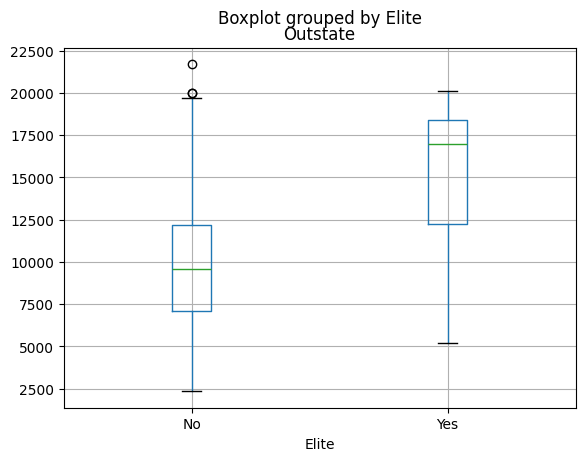

In [286]:
college["Elite"] = pd.cut(college["Top10perc"], [0, 50, 100], labels=["No", "Yes"])
print(college["Elite"].value_counts())
college.boxplot(column = "Outstate", by = "Elite")
plt.show()

## (g)

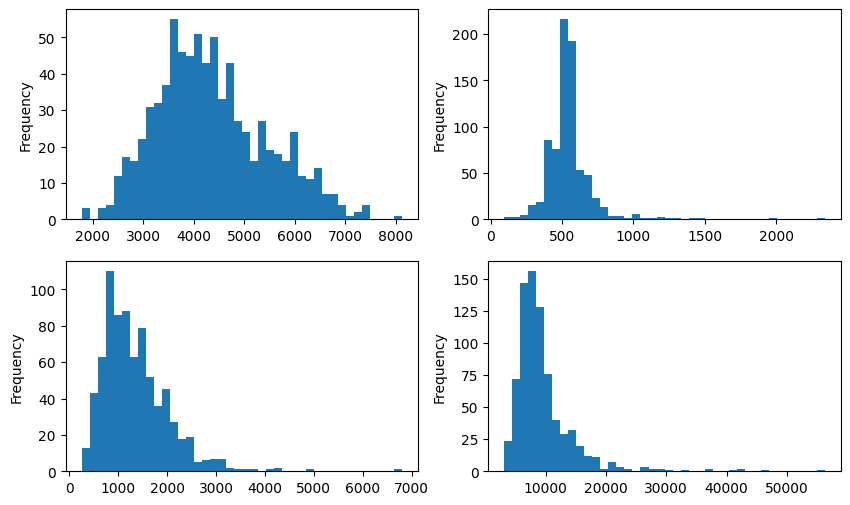

In [287]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
college["Room.Board"].plot.hist(ax=axes[0, 0], bins=40)
college["Books"].plot.hist(ax=axes[0, 1], bins=40)
college["Personal"].plot.hist(ax=axes[1, 0], bins=40)
college["Expend"].plot.hist(ax=axes[1, 1], bins=40)
plt.show()

## (h)

### Correlation visualisation

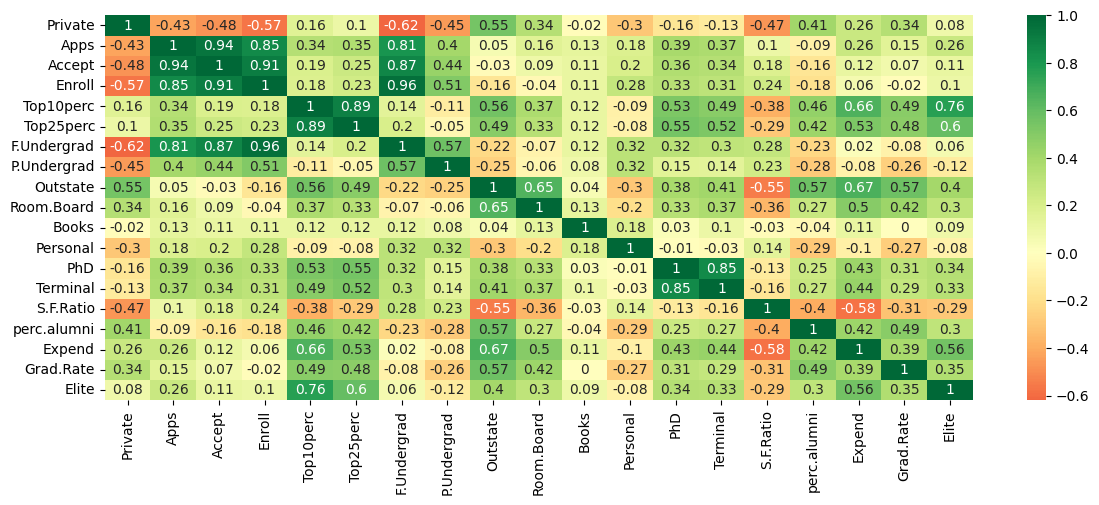

In [288]:
data = college.copy()
data["Private"] = data["Private"].apply(lambda x: 1 if x == "Yes" else 0)
data["Elite"] = data["Elite"].apply(lambda x: 1 if x == "Yes" else 0)
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr("pearson").round(2), annot=True, cmap="RdYlGn", center=0)
plt.show()

In the above matrix we simply use the whole dataframe to get a sense of possible correlations. To begin with, correlations are not the only matter of interest but it can provide an indication on where to start. Another matter of importance to keep in mind is the significance of the correlations; this only represents a sample and not necessarily the entire population. The values represented here show mainly weak linear correlations overall. However there are a larger quantity of positive correlations, even in the edges of the spectrum.  

What should we begin to focus on? The very strong positive cluster in the top-left corner can mainly be ignored. For example, when you accept more applicants you should also see a higher number of enrolled students. At least that is my assumption which seems to be verified here. The same can be said for the correlation of full-time and part-time undergraduates in regards to applicants, accepted and enrolled students. It goes without saying that with more students you will also get more full-time or part-time undergraduates.  

We can see that the top students have a somewhat high positive correlation with both elite status and instructional expenditure. Let us have a look at that.  

### Costs for students

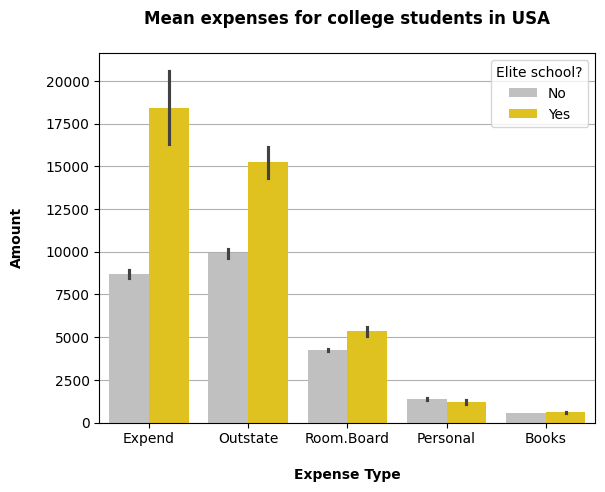

In [289]:
filt = college[["Elite", "Expend", "Outstate", "Room.Board", "Personal", "Books"]]
filt = filt.melt(id_vars="Elite", var_name="Expense.Type", value_name="Amount", ignore_index=False)
pal = {"No": "silver", "Yes": "gold"}
sns.barplot(data=filt, x="Expense.Type", y="Amount", hue="Elite", palette=pal, zorder=2)
plt.title("Mean expenses for college students in USA\n", fontweight="bold")
plt.ylabel("Amount\n", fontweight="bold")
plt.xlabel("\nExpense Type", fontweight="bold")
plt.legend(title="Elite school?")
plt.grid(axis="y", zorder=1)
plt.show()

From the analysis above we can tell that the most differentiating factor when it comes to the costs associated with college depends on the college itself. Elite universities that have a higher attendance of students that were top of their classes in high school will demand more, economically, of each student. We do not have a list of what expenses are totalled in this column but we can assume to some extent that it could include tuition and other fees since the out-of-state tuition seem to be following the same trend.    

All other categories show, in relation, statistically negligible differences between top colleges and others, especially expenses for daily living and academic materials. 

With that said, where do these colleges put this money? Will it go directly/indirectly towards the students education or not?  

### Success and prestige

In [290]:
# Grad.Rate
# perc.alumni
# S.F.Ratio
# Terminal
# PhD

# how to show Elite Yes above other markers? zorder somehow?

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,No


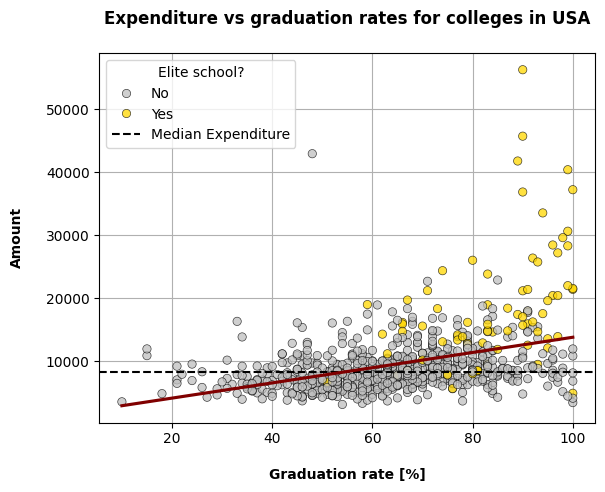

In [291]:
# Cazenovia College	has a graduation rate of 118 % and will be removed
outliers = college[college["Grad.Rate"] > 100]
display(outliers)
data = college.copy()
data = data.drop(data[data["Grad.Rate"] > 100].index)
ax = sns.scatterplot(data=data, x="Grad.Rate", y="Expend", hue="Elite", palette=pal, edgecolor="black", alpha=0.75, zorder=2)

ax.axhline(data["Expend"].median(), color="black", linestyle="--", label="Median Expenditure")
sns.regplot(data=data, x="Grad.Rate", y="Expend", scatter=False, color="maroon", ci=None)
plt.title("Expenditure vs graduation rates for colleges in USA\n", fontweight="bold")
plt.ylabel("Amount\n", fontweight="bold")
plt.xlabel("\nGraduation rate [%]", fontweight="bold")
plt.legend(title="Elite school?")
plt.grid(zorder=1)
plt.show()

First off we look at the relationship between costly educations and the students graduation rate. Will higher spending undergraduates get better grades? Assuming that the graduation rate is a percentage we have an outlier that can be deemed incorrect due to its high value. Cazenovia College has a graduation rate of 118 % which is not plausible and we therefore drop this column entirely form the data set. Since costs can soar for more prestigious institutions I have chosen to display the median expenses instead of the mean.  

The above graph would seem to agree with the weak Pearson correlation coefficient (r) of approximately 0.39. If we would have ignored or cleared more outliers then the slope of the regression line would be even more horisontal. Or it could be viewed as a non-linear correlation since we have a significant increase of costs for elite universities with higher graduation rates. Ain't that well, students who pay enormous amounts of money for school also graduates more often?

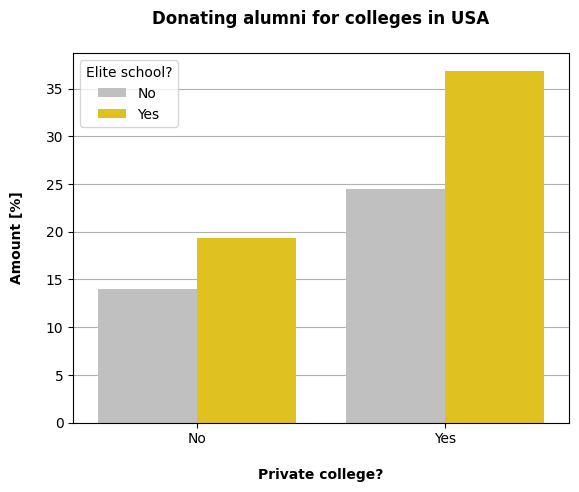

In [292]:
alumni = college.groupby(["Private", "Elite"], observed=True)["perc.alumni"].mean()
alumni = alumni.reset_index()
sns.barplot(data=alumni, x="Private", y="perc.alumni", hue="Elite", palette=pal, zorder=2)
plt.title("Donating alumni for colleges in USA\n", fontweight="bold")
plt.ylabel("Amount [%]\n", fontweight="bold")
plt.xlabel("\nPrivate college?", fontweight="bold")
plt.legend(title="Elite school?")
plt.grid(axis="y", zorder=1)
plt.show()

We have seen that elite colleges charge their students more and what we see in the above graph is that these students also seem to continue to contribute. After graduation the more elite status a school has the higher the chance that alumni donate. The bars do visualise a trend that private and elite schools have a larger pool of alumni that donates.  

I feel quite safe to state that we will not be able to find the cause for this in the data set. It could be due to the culture of each institution, a demand for students receiving scholarships or government policy that public schools get funded differently. We would need to consult a field expert before making any assumptions. However we can also safely state once more that private and elite colleges are more taxing on their students.  

That said, let us attempt to visualise a possible reason for the donations.  

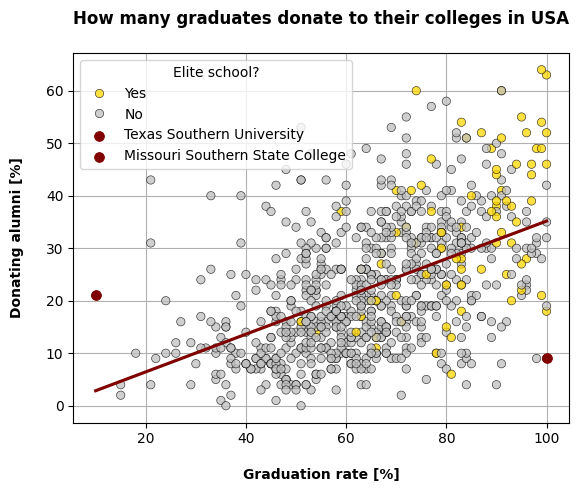

In [293]:
mask = data[data["perc.alumni"] > 20] 
mask = mask[mask["Grad.Rate"] < 20]
mask = mask.reset_index()
uni = mask.iloc[0, 0]
# display(mask)

mask2 = data[data["perc.alumni"] < 10] 
mask2 = mask2[mask2["Grad.Rate"] > 98]
mask2 = mask2[mask2["Apps"] > 1000]
mask2 = mask2.reset_index()
uni2 = mask2.iloc[0, 0]
# display(mask2)

sns.scatterplot(data=data, y="perc.alumni", x="Grad.Rate", hue="Elite", hue_order=["Yes", "No"], palette=pal, edgecolor="black", alpha=0.75, zorder=2)
sns.scatterplot(data=mask, x="Grad.Rate", y="perc.alumni", color="maroon", edgecolor="maroon", zorder=3, s=50, label=uni)
sns.scatterplot(data=mask2, x="Grad.Rate", y="perc.alumni", color="maroon", edgecolor="maroon", zorder=3, s=50, label=uni2)
sns.regplot(data=data, y="perc.alumni", x="Grad.Rate", scatter=False, color="maroon", ci=None)
plt.title("How many graduates donate to their colleges in USA\n", fontweight="bold")
plt.ylabel("Donating alumni [%]\n", fontweight="bold")
plt.xlabel("\nGraduation rate [%]", fontweight="bold")
plt.legend(title="Elite school?")
plt.grid(zorder=1)
plt.show()

What we set out to do here is to have a look at if alumni who graduate are more likely to donate. I am not sure if this graph indicates that there is a linear correlation or not despite coefficient r = 0.49. At first glance each variable do not appear to change at a constant rate. On the flipside the majority of donations come from students that achieve higher rates of graduation.  

It is important to note that each marker in the scatter plot indicates an average for that institution. And that when the graduation rate increase there is likely a higher number of alumni that potentially would donate to the institution where they graduated from.  

I have outlined Texas Southern University as an example to visualise something interesting. The graduation rate is only 10 % but 21 % out of all those who do graduate donate to their alma mater. We can not speculate as to why they donate. It is however fascinating that a school with the worst graduation rates in this entire sample has a higher percentage of donors than a university with 100 % graduation rates (Missouri Southern State College).  

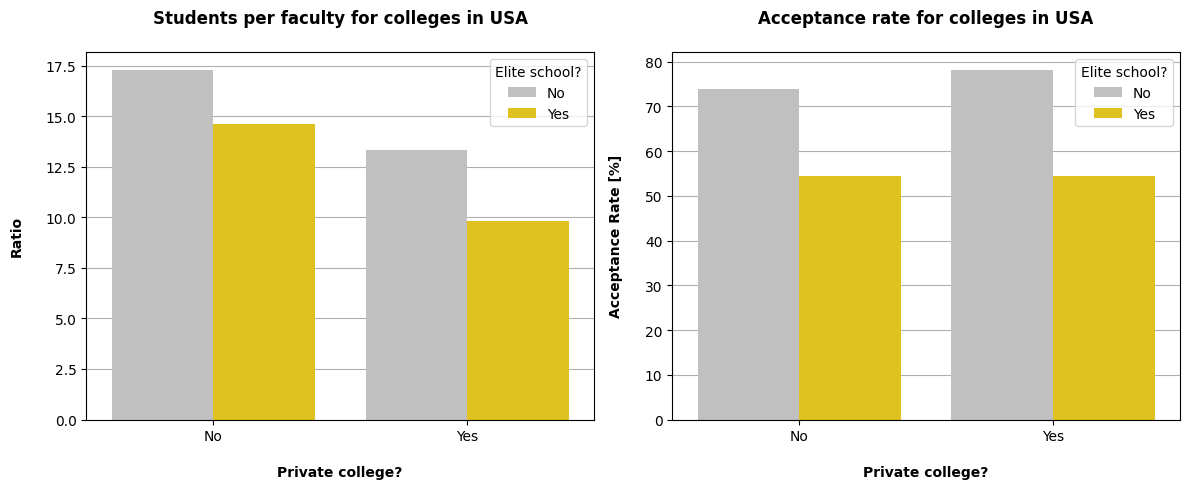

In [294]:
data = college.copy()
data.insert(4, "perc.acc", np.nan)
data["perc.acc"] = ((data["Accept"] / data["Apps"]) * 100).round(0).astype(int)

alumni = college.groupby(["Private", "Elite"], observed=True)["S.F.Ratio"].mean()
alumni = alumni.reset_index()

acc = data.groupby(["Private", "Elite"], observed=True)["perc.acc"].mean()
acc = acc.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=alumni, x="Private", y="S.F.Ratio", hue="Elite", palette=pal, zorder=2, ax=axes[0])
axes[0].set_title("Students per faculty for colleges in USA\n", fontweight="bold")
axes[0].set_ylabel("Ratio\n", fontweight="bold")
axes[0].set_xlabel("\nPrivate college?", fontweight="bold")
axes[0].legend(title="Elite school?")
axes[0].grid(axis="y", zorder=1)

sns.barplot(data=acc, x="Private", y="perc.acc", hue="Elite", palette=pal, zorder=2, ax=axes[1])
axes[1].set_title("Acceptance rate for colleges in USA\n", fontweight="bold")
axes[1].set_ylabel("Acceptance Rate [%]\n", fontweight="bold")
axes[1].set_xlabel("\nPrivate college?", fontweight="bold")
axes[1].legend(title="Elite school?")
axes[1].grid(axis="y", zorder=1)

plt.tight_layout()
plt.show()

So far we have seen that private and elite universities receives more funding from current and former students. How expensive the school is does not seem to directly impact the graduation rates. So where do they put that money? It is clear that private and elite schools employ more faculty members since the ratio is smaller. Could that be due to that they accept fewer students? It would not seem so according to the graph to the right which does not follow the same trend despite elite universities in general having lower acceptance rates.  

Private and elite colleges could perhaps offer more time per student from their faculty. Is it all quantity or also quality?  

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Texas A&M University at Galveston,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43,No


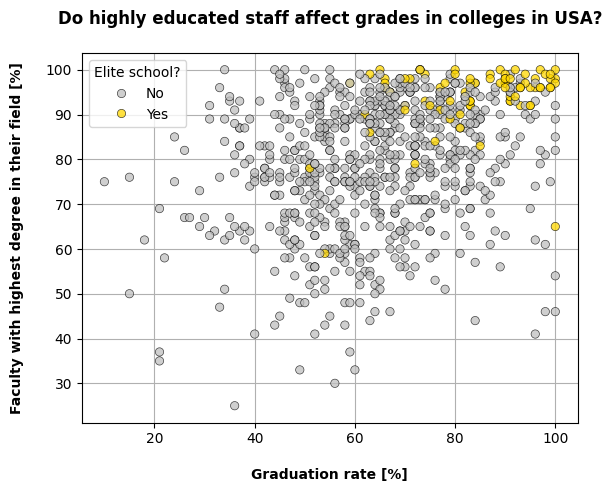

Elite
No     108
Yes     49
Name: count, dtype: int64

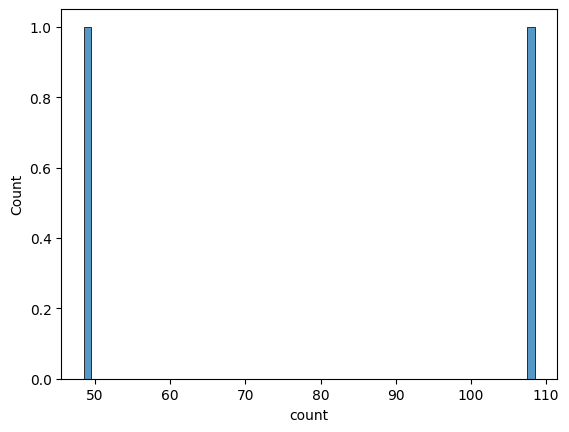

In [300]:
# Texas A&M University at Galveston has a PhD rate of over 100 % and will be removed
data = college.copy()
outliers = data[data["PhD"] > 100]
display(outliers)
data = data.drop(data[data["PhD"] > 100].index)
data = data.drop(data[data["Grad.Rate"] > 100].index)

data.insert(data.columns.get_loc("Personal") + 1, "Fac.Degree", np.nan)
data["Fac.Degree"] = data.apply(lambda row: row["PhD"] if row["PhD"] > row["Terminal"] else row["Terminal"], axis=1)
data = data.drop(["PhD", "Terminal"], axis=1)

sns.scatterplot(data=data, x="Grad.Rate", y="Fac.Degree", hue="Elite", palette=pal, edgecolor="black", alpha=0.75, zorder=2)
plt.title("Do highly educated staff affect grades in colleges in USA?\n", fontweight="bold")
plt.ylabel("Faculty with highest degree in their field [%]\n", fontweight="bold")
plt.xlabel("\nGraduation rate [%]", fontweight="bold")
plt.legend(title="Elite school?")
plt.grid(zorder=1)
plt.show()

filt = data[(data["Fac.Degree"] > 10) & (data["Grad.Rate"] > 80)]
filt = filt["Elite"].value_counts()#.to_list()
# filt = filt.pivot_table(index="Elite", columns="Grad.Rate")
sns.histplot(data=filt, discrete=True, stat="count", multiple="stack")
# sns.lineplot(data=filt, y="Fac.Degree", x="Grad.Rate", hue="Elite")
filt

First and foremost I dropped Texas A&M University of Galveston since they had a Ph.D. percentage over 100. I have also removed the entire Ph.D. and Terminal columns. My understanding is that a Ph.D. is a terminal degree in itself but not all terminal degrees are Ph.D's. Therefore I have created a new column showing the percentage of faculty who hold the highest degree in their respective field (the highest value from the former columns).  



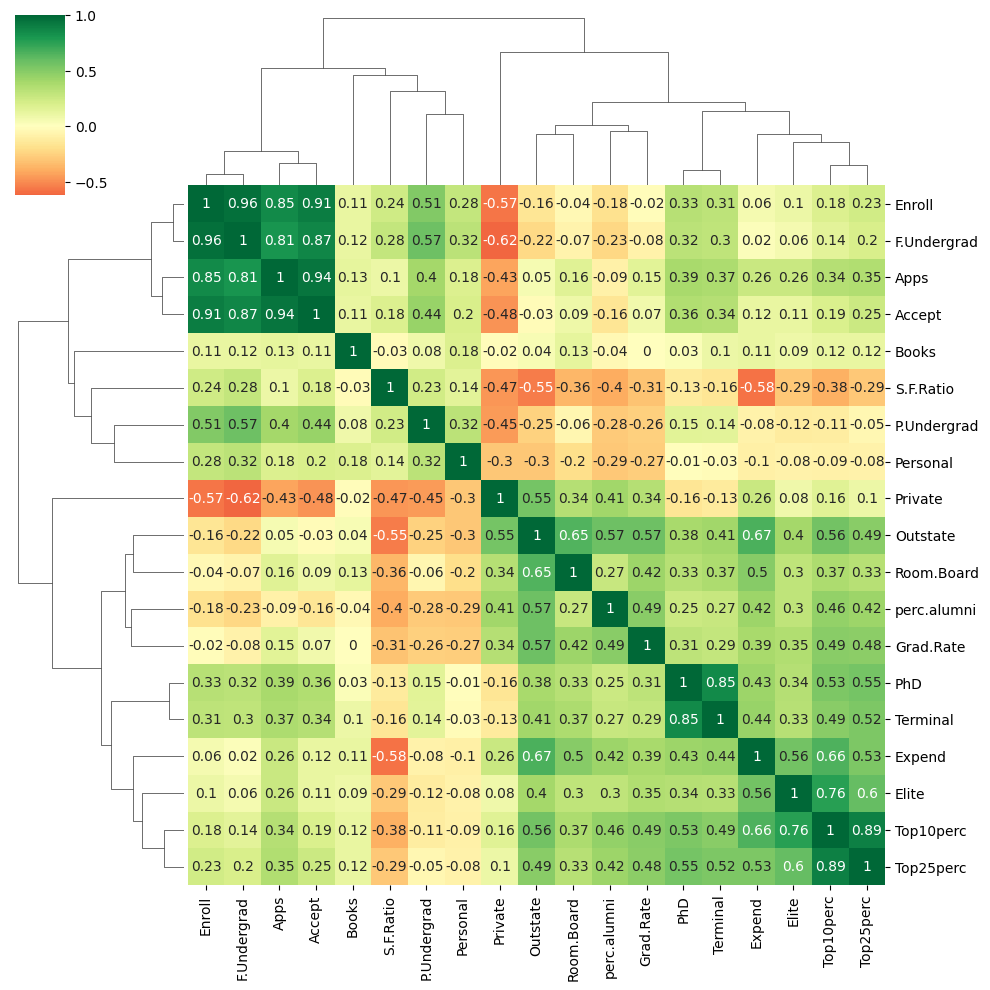

In [296]:
# FK Abraham 0101127500

data = college.copy()
data["Private"] = data["Private"].apply(lambda x: 1 if x == "Yes" else 0)
data["Elite"] = data["Elite"].apply(lambda x: 1 if x == "Yes" else 0)
sns.clustermap(data.corr("pearson").round(2), annot=True, cmap="RdYlGn", center=0)
plt.show()

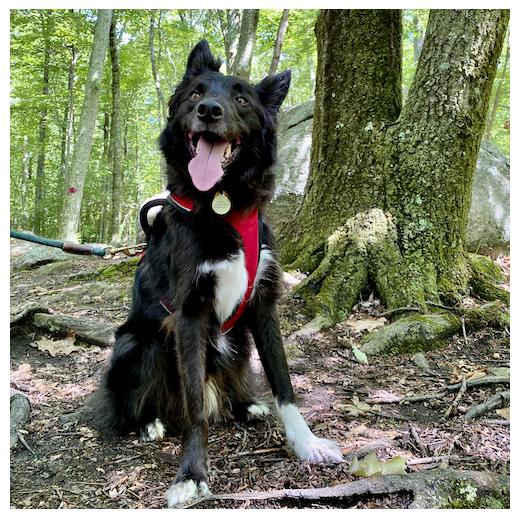

In [297]:
sns.dogplot(data=data, x="S.F.Ratio", y="Grad.Rate", hue="Elite", palette=pal, zorder=2)